In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

In [3]:
autoencoder = Sequential()

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [4]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())

In [5]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 33s 62ms/step - loss: 0.2723 - val_loss: 0.2071
Epoch 2/50
469/469 [==============================] - 22s 48ms/step - loss: 0.2051 - val_loss: 0.1907
Epoch 3/50
 78/469 [===>..........................] - ETA: 18s - loss: 0.2020

KeyboardInterrupt: 

313/313 [==============================] - 2s 7ms/step


ValueError: cannot reshape array of size 12544 into shape (28,28)

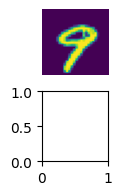

In [ ]:
random_test = np.random.randint(x_test.shape[0], size=5)

ae_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')

plt.show()